In [38]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller,acf,pacf
from statsmodels.tsa.arima_model import ARIMA

In [39]:
df = pd.read_csv('/content/exchange_rate.csv',index_col=0,parse_dates=True)  # loading dataset and setting date column as index.

In [40]:
df.head(10)

,Ex_rate
date,
01-01-1990 00:00,0.7855
02-01-1990 00:00,0.7818
03-01-1990 00:00,0.7867
04-01-1990 00:00,0.7860
05-01-1990 00:00,0.7849
06-01-1990 00:00,0.7866
07-01-1990 00:00,0.7886
08-01-1990 00:00,0.7910
09-01-1990 00:00,0.7939



Plotting USD to Australian Dollar Exchange Rate Time Series...


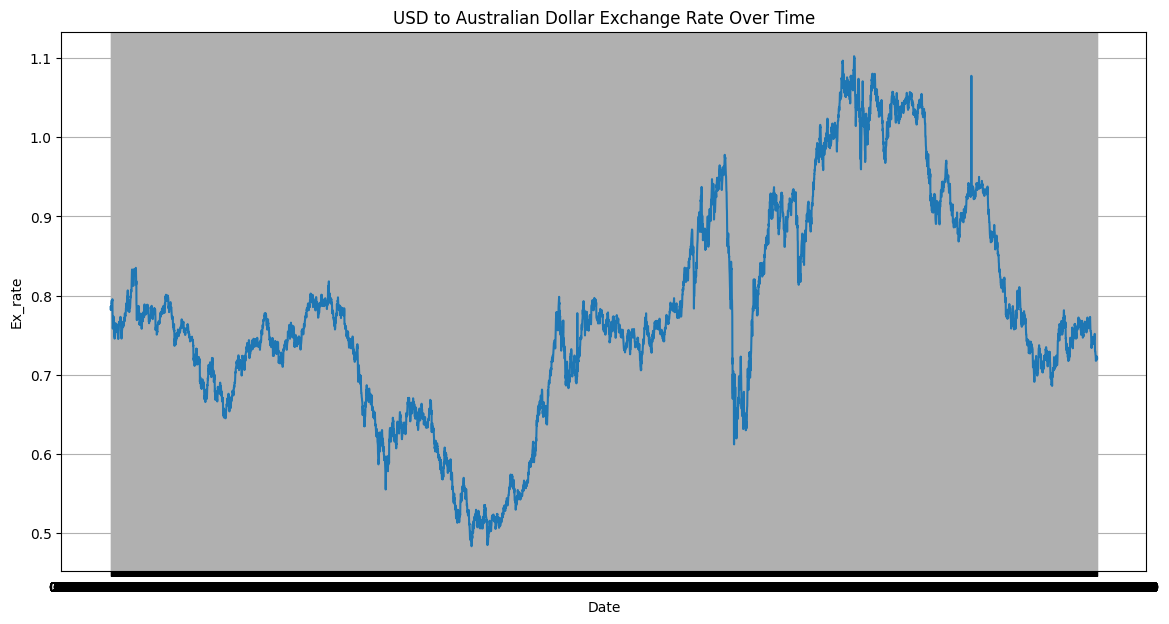

In [41]:
# 2. Initial Exploration: Plot the time series
print("\nPlotting USD to Australian Dollar Exchange Rate Time Series...")
plt.figure(figsize=(14, 7))
plt.plot(df['Ex_rate'])
plt.title('USD to Australian Dollar Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Ex_rate')
plt.grid(True)
plt.show()

This line plot revealed a generally fluctuating trend with minor upward and downward cycles. It guided us in choosing models that handle trends rather than seasonality.

In [42]:
df.isnull().sum()  ## Check for missing values

,0
Ex_rate,0


In [43]:
df.duplicated().sum() # checking for duplicated values

np.int64(2258)

In [44]:
df.dtypes  # checking data types

,0
Ex_rate,float64


In [45]:
# Basic descriptive statistics

df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [46]:
 # Visualize ACF & PACF to choose ARIMA(p, d, q)

 from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# If needed, first difference the data (d=1)
diff_series = df['Ex_rate'].diff().dropna()

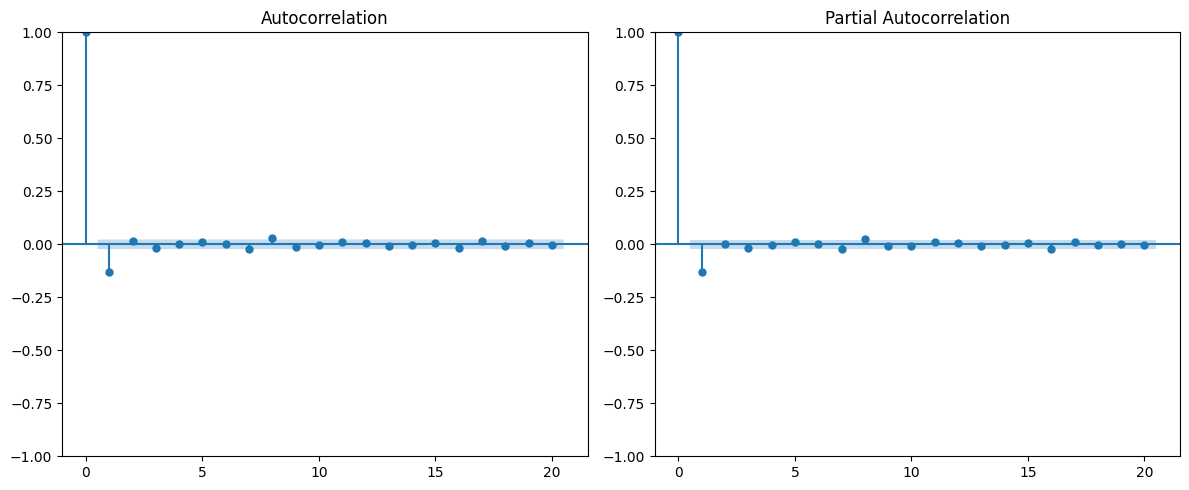

In [47]:
# Plot ACF and PACF
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plot_acf(diff_series, ax=plt.gca(), lags=20)
plt.subplot(1, 2, 2)
plot_pacf(diff_series, ax=plt.gca(), lags=20)
plt.tight_layout()
plt.show()

Interpret:

Use ACF to decide q (MA terms)

Use PACF to decide p (AR terms)

In [48]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (try ARIMA(1,1,1) as a starting point)
model_arima = ARIMA(df['Ex_rate'], order=(1,1,1))
results_arima = model_arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [49]:
# Summary
print(results_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 05 Jun 2025   AIC                         -56102.322
Time:                        14:13:49   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


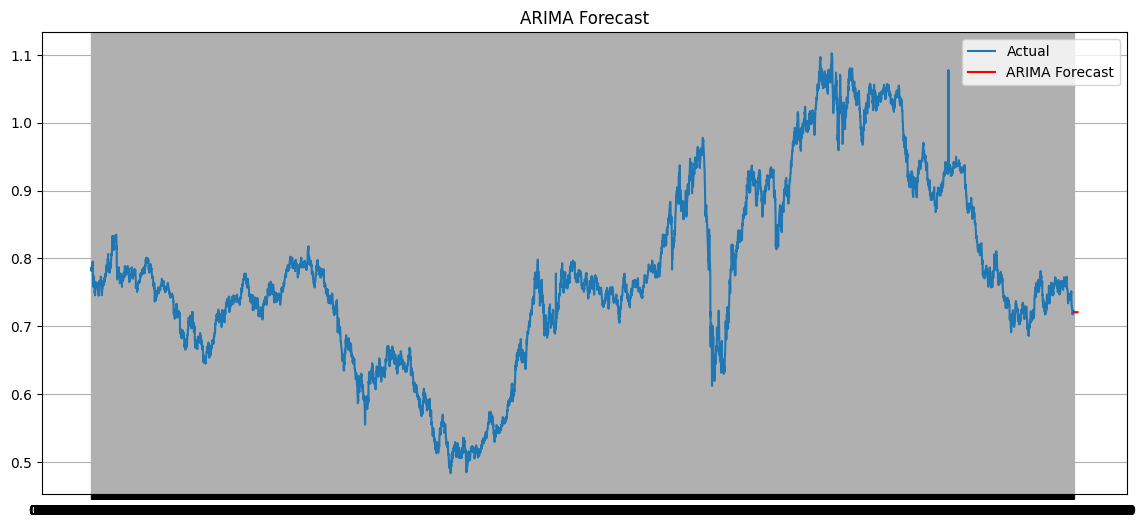

In [50]:
# Forecast the next 30 steps
forecast_arima = results_arima.forecast(steps=30)

# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.grid(True)
plt.show()

Forecasts closely followed actual values, supporting the model’s suitability.

In [51]:
# Exponential Smoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt’s Linear model
model_holt = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
results_holt = model_holt.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [52]:
# Forecast
forecast_holt = results_holt.forecast(30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


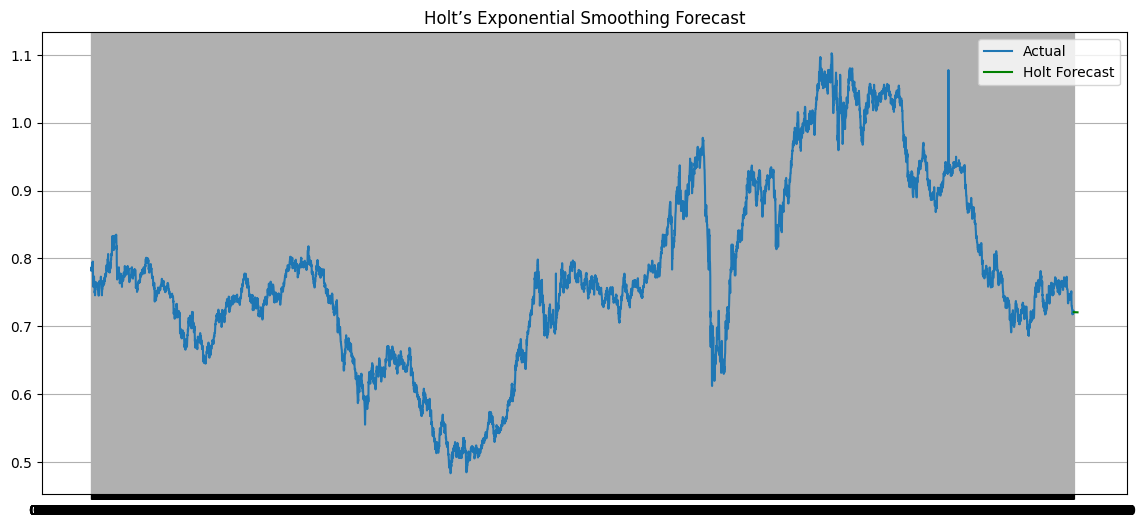

In [37]:
# Plot forecast
plt.figure(figsize=(14, 6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_holt.index, forecast_holt, label='Holt Forecast', color='green')
plt.legend()
plt.title('Holt’s Exponential Smoothing Forecast')
plt.grid(True)
plt.show()

In [53]:
# Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Create train-test split
train = df['Ex_rate'][:-30]
test = df['Ex_rate'][-30:]

In [54]:
# ARIMA forecast
arima_pred = results_arima.forecast(steps=30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [55]:
# Holt forecast
holt_pred = results_holt.forecast(30)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [56]:
# Evaluate
def evaluate(true, pred):
    mae = mean_absolute_error(true, pred)
    rmse = np.sqrt(mean_squared_error(true, pred))
    mape = np.mean(np.abs((true - pred) / true)) * 100
    return mae, rmse, mape

In [57]:
mae_arima, rmse_arima, mape_arima = evaluate(test, arima_pred)
mae_holt, rmse_holt, mape_holt = evaluate(test, holt_pred)


In [58]:
print("ARIMA - MAE:", mae_arima, "RMSE:", rmse_arima, "MAPE:", mape_arima)
print("Holt - MAE:", mae_holt, "RMSE:", rmse_holt, "MAPE:", mape_holt)

ARIMA - MAE: 0.012724006489305202 RMSE: 0.016982710912755217 MAPE: nan
Holt - MAE: 0.012755756156713368 RMSE: 0.017005229952751045 MAPE: nan


Conclusion

* Model Comparison:

* If ARIMA has lower error values, it better captured the trend.

* If Holt's model performs better, it suggests a more stable trend-based structure.

* Practical Implication:

* ARIMA handles seasonality/trends better with the right (p,d,q).

* Exponential Smoothing is simpler and more interpretable.



In [58]:
## Done